#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [113]:
import numpy as np
from itertools import product
import time
import matplotlib.pyplot as plt
from random import randint
!nvidia-smi

fish: Unknown command: nvidia-smi
fish: 
nvidia-smi
^~~~~~~~~^


In [114]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [115]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    items = product([0, 1], repeat=len(weights))
    best_permutation = None
    best_profit, best_weight = 0, 0
    for permutation in items:
        profit = sum([self.profits[i] for i, value in enumerate(permutation) if value == 1])
        weight = sum([self.weights[i] for i, value in enumerate(permutation) if value == 1])
        if profit > best_profit and weight <= self.capacity:
          best_permutation = permutation
          best_profit = profit
          best_weight = weight

    indexes = [i for i, x in enumerate(best_permutation) if x == 1]
    return indexes, best_profit, best_weight

  def solve_knapsack_pw_ratio(self):
    items = [0 for _ in range(len(weights))]
    profit, weight = 0, 0
    ratios = sorted([(i, item[0]/item[1]) for i, item in enumerate(zip(self.profits, self.weights))], key=lambda x: x[1], reverse=True)
    for i, _ in ratios:
      if weight + weights[i] < self.capacity:
        weight += weights[i]
        profit += profits[i]
        items[i] = 1

    indexes = [i for i, x in enumerate(items) if x == 1]
    return indexes, profit, weight

In [116]:
sack = KnapSack(profits, weights, capacity)

In [117]:
items, profit, weight = sack.solve_knapsack_brute_force()
print("Brute force solve")
print(f"Maximum capacity: {capacity}")
print(f"Selected items: {items}\tTotal profit: {profit}\tTotal weight: {weight}")

Brute force solve
Maximum capacity: 9
Selected items: [1, 2]	Total profit: 17	Total weight: 8


In [118]:
items, profit, weight = sack.solve_knapsack_pw_ratio()
print("Heuristic pw ratio solve")
print(f"Maximum capacity: {capacity}")
print(f"Selected items: {items}\tTotal profit: {profit}\tTotal weight: {weight}")

Heuristic pw ratio solve
Maximum capacity: 9
Selected items: [1, 3]	Total profit: 14	Total weight: 5


In [119]:
weights = np.array([8, 3, 5, 2])
profits = np.array([16, 8, 9, 6])

execution_times = []
execution_times_ratio = []
number_of_elements = []
number_of_elements_2 = []

additional_elements = 15
additional_elements_2 = 300
execution_time_brute = 0

for _ in range(additional_elements):
  weights = np.append(weights, randint(1, 20))
  profits = np.append(profits, randint(1, 20))
  sack = KnapSack(profits, weights, capacity)

  start_time = time.process_time()
  sack.solve_knapsack_brute_force()
  end_time = time.process_time()
  execution_time_brute = end_time - start_time

  print(f"Elements: {len(weights)}\tBrute executed in: {execution_time_brute} [s]")
  execution_times.append(execution_time_brute)
  number_of_elements.append(len(weights))

weights = np.array([8, 3, 5, 2])
profits = np.array([16, 8, 9, 6])

for _ in range(additional_elements_2):
  weights = np.append(weights, randint(1, 20))
  profits = np.append(profits, randint(1, 20))
  sack = KnapSack(profits, weights, capacity)

  start_time = time.process_time()
  sack.solve_knapsack_pw_ratio()
  end_time = time.process_time()
  execution_time_ratio = end_time - start_time

  print(f"Elements: {len(weights)}\tRatio executed in: {execution_time_ratio} [s]")
  execution_times_ratio.append(execution_time_ratio)
  number_of_elements_2.append(len(weights))

Elements: 5	Brute executed in: 6.100000000230921e-05 [s]
Elements: 6	Brute executed in: 0.0002389999999934389 [s]
Elements: 7	Brute executed in: 0.00041500000000382897 [s]
Elements: 8	Brute executed in: 0.00039799999999701186 [s]
Elements: 9	Brute executed in: 0.0007799999999988927 [s]
Elements: 10	Brute executed in: 0.0015629999999973165 [s]
Elements: 11	Brute executed in: 0.0037650000000013506 [s]
Elements: 12	Brute executed in: 0.011220999999999037 [s]
Elements: 13	Brute executed in: 0.018610000000002458 [s]
Elements: 14	Brute executed in: 0.0340580000000017 [s]
Elements: 15	Brute executed in: 0.07114299999999929 [s]
Elements: 16	Brute executed in: 0.14859500000000025 [s]
Elements: 17	Brute executed in: 0.3003309999999999 [s]
Elements: 18	Brute executed in: 0.6234090000000023 [s]
Elements: 19	Brute executed in: 1.311708000000003 [s]
Elements: 5	Ratio executed in: 1.7999999997186933e-05 [s]
Elements: 6	Ratio executed in: 7.000000003642981e-06 [s]
Elements: 7	Ratio executed in: 5.9999

Text(0.5, 1.0, 'Brute force algorithm Time vs Elements')

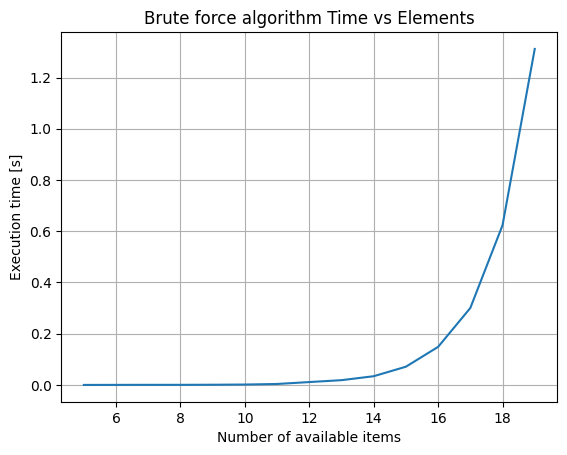

In [120]:
plt.plot(number_of_elements, execution_times)
plt.grid()
plt.ylabel("Execution time [s]")
plt.xlabel("Number of available items")
plt.title("Brute force algorithm Time vs Elements")

Text(0.5, 1.0, 'Heuristic function Time vs Elements')

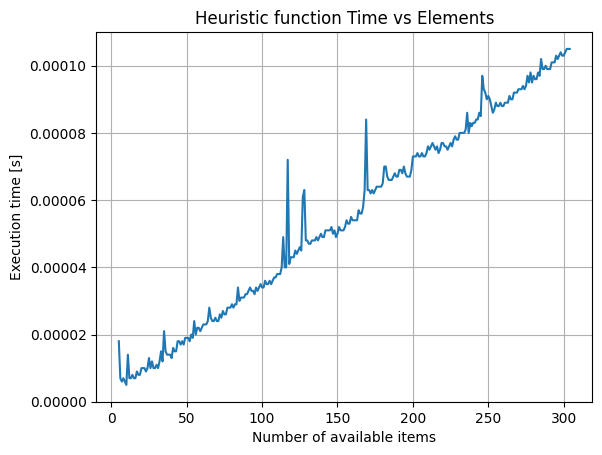

In [121]:
plt.plot(number_of_elements_2, execution_times_ratio)
plt.grid()
plt.ylabel("Execution time [s]")
plt.xlabel("Number of available items")
plt.title("Heuristic function Time vs Elements")

Text(0.5, 1.0, 'Brute force algorithm vs Heuristic function')

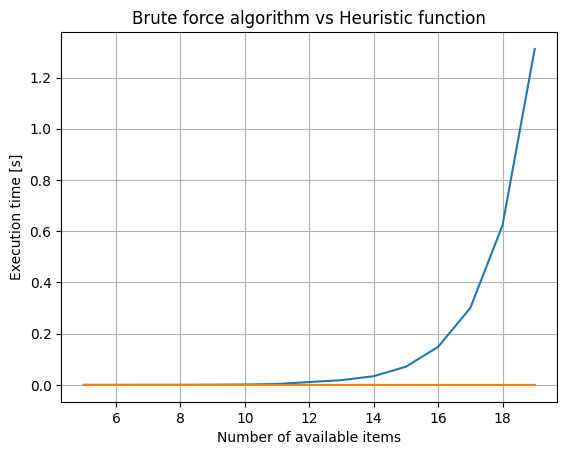

In [122]:
plt.plot(number_of_elements, execution_times)
plt.plot(number_of_elements, execution_times_ratio[:len(number_of_elements)])
plt.grid()
plt.ylabel("Execution time [s]")
plt.xlabel("Number of available items")
plt.title("Brute force algorithm vs Heuristic function")

# Wnioski
## Czas wykonywania
Dla początkowej ilości przedmiotów, które rozważaliśmy w problemie plecakowym, tj. 5 elementów, metoda brute force oraz metoda wykorzystująca funkcję heurystyczną wykonują się w porównywalnym czasie. Jednakże, dla każdego kolejnego elementu, czas wykonania metody brute force rośnie w sposób wykładniczy (mamy do czynienia z ekspozją kombinatoryczną). Z drugiej strony czas rozwiązania problemu funkcją heurystyczną rośnie w sposób liniowy, ze spółczynnikiem kierunkowym o wartości bliskiej 1. Widoczna jest w tym przypadku także pewna losowość w czasie wykonywania się funkcji wynikająca z faktu różnego obciążenia procesora i jego taktowania w trakcie kolejnych uruchomień funkcji.
## Porównanie wyników
* Metoda brute force zawsze znajduje najbardziej optymalne rozwiązanie problemu plecakowego, jednakże okupuje to czasem rozwiązania problemu, który dla małej liczby przedmiotów jest zadowalający. Niestety już niewielki wzrost liczby elementów do rozpatrzenia powoduje, że metoda ta staje się nieakceptowalna ze względu na czas.
* Metoda wykorzystująca funkcję heurystyczną nie gwarantuje znalezienia najbardziej optymalnego rozwiązania i tak stało się w przypadku początkowych 5 przedmiotów. Ma jednak sporą zaletę, którą jest liniowa zależność czasu rozwiązania od ilości elementów do rozpatrzenia. Z tego powodu warto rozważyć stosowanie tej funkcji w przypadku, gdy nie potrzebujemy najbardziej optymalnego rozwiązania, ale zadowolimy się względnie optymalnym wynikiem.
## Podsumowanie
Jak już wspomniałem jeden i drugi algorytm ma swoje wady i zalety, które należy rozważyć przed wyborem jednego z nich do naszego problemu. Osobiście wybrałbym 3 opcję jaką jest algorytm A*, który implementuje funkcję heurystyczną wraz z funkcją zysku i algorytmem najpierw lepszy, ponieważ dzięki temu zwiększamy prawdopodobieństwo znalezienia najbardziej optymalnego rozwiązania bez groźby doprowadzenia do eksplozji kombinatorycznej.